In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [296]:
dfx = pd.read_csv("./Training Data/Logistic_X_Train.csv")
dfy = pd.read_csv("./Training Data/Logistic_Y_Train.csv")
dft = pd.read_csv("./Test Cases/Logistic_X_Test.csv")

print(dfx.shape, dfy.shape, dft.shape)

(2250, 2) (2250, 1) (750, 2)


In [297]:
X = dfx.values
Y = dfy.values

Xt = X[:1500]
Xv = X[1500:]
Yt = Y[:1500]
Yv = Y[1500:]

X_ = dft.values

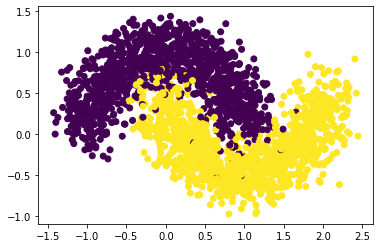

In [298]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [299]:
from keras import models
from keras.layers import Dense

In [300]:
model = models.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [301]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [302]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [303]:
hist = model.fit(Xt, Yt, epochs=100, batch_size=150, validation_data=(Xv, Yv))

Train on 1500 samples, validate on 750 samples
Epoch 1/100
1500/1500 [==============================] - 0s 244us/step - loss: 0.7434 - accuracy: 0.4173 - val_loss: 0.7006 - val_accuracy: 0.4880
Epoch 2/100
1500/1500 [==============================] - 0s 26us/step - loss: 0.6813 - accuracy: 0.5367 - val_loss: 0.6526 - val_accuracy: 0.5747
Epoch 3/100
1500/1500 [==============================] - 0s 26us/step - loss: 0.6383 - accuracy: 0.5913 - val_loss: 0.6136 - val_accuracy: 0.6587
Epoch 4/100
1500/1500 [==============================] - 0s 30us/step - loss: 0.6019 - accuracy: 0.6527 - val_loss: 0.5793 - val_accuracy: 0.6947
Epoch 5/100
1500/1500 [==============================] - 0s 25us/step - loss: 0.5693 - accuracy: 0.7000 - val_loss: 0.5482 - val_accuracy: 0.7333
Epoch 6/100
1500/1500 [==============================] - 0s 29us/step - loss: 0.5402 - accuracy: 0.7313 - val_loss: 0.5200 - val_accuracy: 0.7560
Epoch 7/100
1500/1500 [==============================] - 0s 25us/step - loss

1500/1500 [==============================] - 0s 29us/step - loss: 0.2798 - accuracy: 0.8787 - val_loss: 0.2611 - val_accuracy: 0.8920
Epoch 57/100
1500/1500 [==============================] - 0s 23us/step - loss: 0.2786 - accuracy: 0.8813 - val_loss: 0.2608 - val_accuracy: 0.8920
Epoch 58/100
1500/1500 [==============================] - 0s 29us/step - loss: 0.2778 - accuracy: 0.8800 - val_loss: 0.2593 - val_accuracy: 0.8933
Epoch 59/100
1500/1500 [==============================] - 0s 30us/step - loss: 0.2764 - accuracy: 0.8827 - val_loss: 0.2586 - val_accuracy: 0.8920
Epoch 60/100
1500/1500 [==============================] - 0s 22us/step - loss: 0.2750 - accuracy: 0.8840 - val_loss: 0.2577 - val_accuracy: 0.8947
Epoch 61/100
1500/1500 [==============================] - 0s 28us/step - loss: 0.2738 - accuracy: 0.8820 - val_loss: 0.2555 - val_accuracy: 0.8960
Epoch 62/100
1500/1500 [==============================] - 0s 23us/step - loss: 0.2725 - accuracy: 0.8860 - val_loss: 0.2548 - val_a

In [304]:
h = hist.history

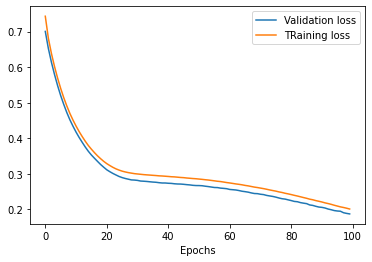

In [305]:
plt.plot(h["val_loss"], label="Validation loss")
plt.plot(h["loss"], label="TRaining loss")

plt.xlabel("Epochs")
plt.legend()
plt.show()

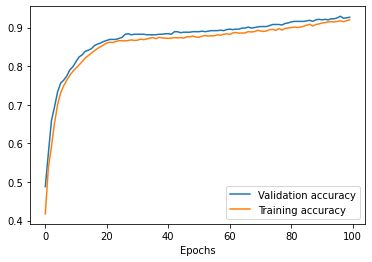

In [306]:
plt.plot(h["val_accuracy"], label="Validation accuracy")
plt.plot(h["accuracy"], label="Training accuracy")

plt.xlabel("Epochs")
plt.legend()
plt.show()

In [307]:
model.evaluate(Xt, Yt)[1]

1500/1500 [==============================] - 0s 38us/step


0.9213333129882812

In [308]:
model.evaluate(Xv, Yv)[1]

750/750 [==============================] - 0s 55us/step


0.9266666769981384

In [309]:
Y_ = model.predict(X_)

In [311]:
Yp = []
for x in Y_:
    if x > 0.5:
        Yp.append(1)
    else:
        Yp.append(0)
#print(Y_)
Yp = np.array(Yp).reshape((-1,1))
print(Y_.shape, Yp.shape)
print(Yp)

(750, 1) (750, 1)
[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [

In [312]:
print(Y)

[[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]


In [313]:
dfpred = pd.DataFrame(Yp)

In [314]:
dfpred.shape

(750, 1)

In [315]:
dfpred.to_csv("./output_classify_points.csv", index=False)

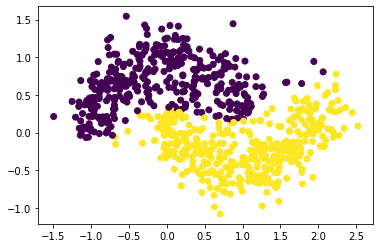

In [316]:
plt.scatter(X_[:,0], X_[:,1], c=Yp)